<a href="https://colab.research.google.com/github/pagaspandhutanoyo/API/blob/main/Copy_of_DecisionTree_IrisCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import library numpy, pandas dan scikit-learn,
#numpy adalah NumPy merupakan singkatan dari Numerical Python. NumPy merupakan
#salah satu library Python yang berfungsi untuk proses komputasi numerik
#pandas adalah https://www.dqlab.id/belajar-python-mengenal-pandas-dan-series-untuk-meningkatkan-kompetensi-data
import numpy as np
import pandas as pd
from sklearn import tree

In [ ]:
#Mounting dataset Iris yang akan digunakan ke dalam environment Google Colab
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/ASSOCIATE DATA SCIENTIST/Materi Sesi 1/"

'1. Pengantar Data Mining (Data Science).pdf'  'Dataset Iris.csv'
'2. Data untuk Data Mining _ CRISP-DM.pdf'      DecisionTree.ipynb
'3. Metode Learning (Machine Learning).pdf'     DecisionTree_IrisCSV.ipynb
'4. Klasifikasi Decision Tree.pdf'


In [ ]:
#Membaca Dataset dari File ke Pandas dataFrame
irisDataset = pd.read_csv('/content/drive/My Drive/ASSOCIATE DATA SCIENTIST/Materi Sesi 1/Dataset Iris.csv', delimiter=';', header=0)

In [ ]:
#fungsi head default menampilkan 5 baris pertama dataset, jika ingin menampilkan lebih dari 5 baris data tambahkan nilai dalam parameter fungsinya
irisDataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,7.00,3.02,4.07,1.04,Iris-versicolor
1,2,6.04,3.02,4.05,1.05,Iris-versicolor
2,3,6.09,3.01,4.09,1.05,Iris-versicolor
3,4,5.05,2.03,4.00,1.03,Iris-versicolor
4,5,6.05,2.08,4.06,1.05,Iris-versicolor


In [ ]:
irisDataset.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,91,6.07,3.01,5.06,2.04,Iris-virginica
91,92,6.09,3.01,5.01,2.03,Iris-virginica
92,93,5.08,2.07,5.01,1.09,Iris-virginica
93,94,6.08,3.02,5.09,2.03,Iris-virginica
94,95,6.07,3.03,5.07,2.05,Iris-virginica
95,96,6.07,3.00,5.02,2.03,Iris-virginica
96,97,6.03,2.05,5.00,1.09,Iris-virginica
97,98,6.05,3.00,5.02,2.00,Iris-virginica
98,99,6.02,3.04,5.04,2.03,Iris-virginica
99,100,5.09,3.00,5.01,1.08,Iris-virginica


In [ ]:
#menampilkan bentuk matrik dataset dengan fungsi shape
irisDataset.shape

(100, 6)

In [ ]:
#menampilkan tipe data dari masing-masing variabel dengan fungsi dtypes
#lebih lengkap tentang dtypes disini https://numpy.org/doc/stable/reference/arrays.dtypes.html
irisDataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
#menampilkan statistik dataset dengan fungsi describe,
#fungsi describe hanya menampilkan dataset yang bertipe numerik, karenanya data species tidak ditampilkan
irisDataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.828200,2.492200,4.504600,1.328600
std,29.011492,0.682243,0.476052,0.828199,0.445877
min,1.000000,4.090000,2.000000,3.000000,1.000000
25%,25.750000,5.080000,2.070000,4.037500,1.030000
50%,50.500000,6.030000,2.090000,4.090000,1.060000
75%,75.250000,6.070000,3.002500,5.052500,2.000000
max,100.000000,7.090000,3.080000,6.090000,2.050000


In [ ]:
#melakukan pengecekan missing value pada dataset dengan fungsi isnull()
irisDataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Mengubah kelas (kolom "Species") dari String ke Unique-Integer
irisDataset["Species"] = pd.factorize(irisDataset.Species)[0]

In [ ]:
#melakukan pengecekan hasil transformasi data Label dari String ke Integer
irisDataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,7.00,3.02,4.07,1.04,0
1,2,6.04,3.02,4.05,1.05,0
2,3,6.09,3.01,4.09,1.05,0
3,4,5.05,2.03,4.00,1.03,0
4,5,6.05,2.08,4.06,1.05,0


In [ ]:
#melakukan pengecekan hasil transformasi data Label dari String ke Integer
irisDataset.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,91,6.07,3.01,5.06,2.04,1
91,92,6.09,3.01,5.01,2.03,1
92,93,5.08,2.07,5.01,1.09,1
93,94,6.08,3.02,5.09,2.03,1
94,95,6.07,3.03,5.07,2.05,1
95,96,6.07,3.00,5.02,2.03,1
96,97,6.03,2.05,5.00,1.09,1
97,98,6.05,3.00,5.02,2.00,1
98,99,6.02,3.04,5.04,2.03,1
99,100,5.09,3.00,5.01,1.08,1


In [ ]:
#Menghapus kolom "Id", karena dalam data science id(unique data) tidak dibutuhkan karena tidak berpengaruh terhadap model data yang dibangun
irisDataset = irisDataset.drop(labels="Id", axis=1)

In [ ]:
#mengecek kolom ID yang sudah dihapus
irisDataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.00,3.02,4.07,1.04,0
1,6.04,3.02,4.05,1.05,0
2,6.09,3.01,4.09,1.05,0
3,5.05,2.03,4.00,1.03,0
4,6.05,2.08,4.06,1.05,0


In [ ]:
#mengecek korelasi antar atribut dalam dataset
irisDataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,0.372102,0.709930,0.398166,0.445772
SepalWidthCm,0.372102,1.000000,0.365902,0.421105,0.268544
PetalLengthCm,0.709930,0.365902,1.000000,0.636250,0.777382
PetalWidthCm,0.398166,0.421105,0.636250,1.000000,0.667205
Species,0.445772,0.268544,0.777382,0.667205,1.000000


<Axes: >

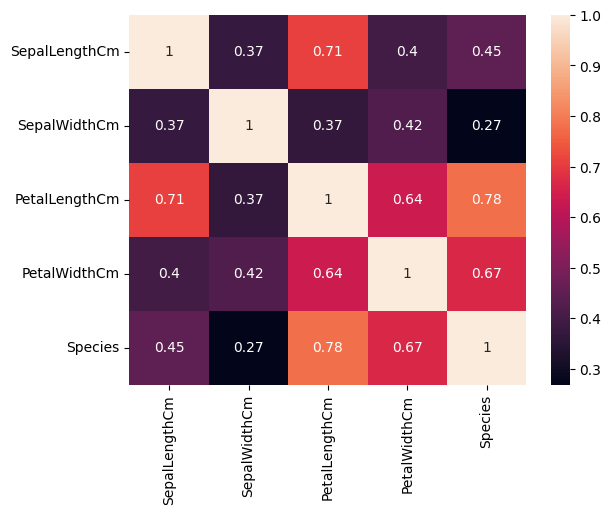

In [ ]:
#menampilkan visualisasi korelasi dengan library seaborn (adalah lib untuk membuat visualisasi statistik data)
import seaborn as sns
sns.heatmap(irisDataset.corr(), annot = True)

In [ ]:
#Mengubah dataFrame (df) ke array Numpy
#Mengubah df ke dalam bentuk array numpy untuk memudahkan proses operasi matriks dalam python
irisDataset = irisDataset.to_numpy()

In [ ]:
#melakukan pengecekan array numpy yang baru kita bentuk
irisDataset

array([[7.  , 3.02, 4.07, 1.04, 0.  ],
       [6.04, 3.02, 4.05, 1.05, 0.  ],
       [6.09, 3.01, 4.09, 1.05, 0.  ],
       [5.05, 2.03, 4.  , 1.03, 0.  ],
       [6.05, 2.08, 4.06, 1.05, 0.  ],
       [5.07, 2.08, 4.05, 1.03, 0.  ],
       [6.03, 3.03, 4.07, 1.06, 0.  ],
       [4.09, 2.04, 3.03, 1.  , 0.  ],
       [6.06, 2.09, 4.06, 1.03, 0.  ],
       [5.02, 2.07, 3.09, 1.04, 0.  ],
       [5.  , 2.  , 3.05, 1.  , 0.  ],
       [5.09, 3.  , 4.02, 1.05, 0.  ],
       [6.  , 2.02, 4.  , 1.  , 0.  ],
       [6.01, 2.09, 4.07, 1.04, 0.  ],
       [5.06, 2.09, 3.06, 1.03, 0.  ],
       [6.07, 3.01, 4.04, 1.04, 0.  ],
       [5.06, 3.  , 4.05, 1.05, 0.  ],
       [5.08, 2.07, 4.01, 1.  , 0.  ],
       [6.02, 2.02, 4.05, 1.05, 0.  ],
       [5.06, 2.05, 3.09, 1.01, 0.  ],
       [5.09, 3.02, 4.08, 1.08, 0.  ],
       [6.01, 2.08, 4.  , 1.03, 0.  ],
       [6.03, 2.05, 4.09, 1.05, 0.  ],
       [6.01, 2.08, 4.07, 1.02, 0.  ],
       [6.04, 2.09, 4.03, 1.03, 0.  ],
       [6.06, 3.  , 4.04,

In [ ]:
#Melakukan Validasi Data dengan Manual Split
#Membagi Dataset => 80 baris data untuk training dan 20 baris data untuk testing
dataTraining = np.concatenate((irisDataset[0:40, :], irisDataset[50:90, :]),
                              axis=0)
dataTesting = np.concatenate((irisDataset[40:50, :], irisDataset[90:100, :]),
                             axis=0)


In [ ]:
dataTraining

array([[7.  , 3.02, 4.07, 1.04, 0.  ],
       [6.04, 3.02, 4.05, 1.05, 0.  ],
       [6.09, 3.01, 4.09, 1.05, 0.  ],
       [5.05, 2.03, 4.  , 1.03, 0.  ],
       [6.05, 2.08, 4.06, 1.05, 0.  ],
       [5.07, 2.08, 4.05, 1.03, 0.  ],
       [6.03, 3.03, 4.07, 1.06, 0.  ],
       [4.09, 2.04, 3.03, 1.  , 0.  ],
       [6.06, 2.09, 4.06, 1.03, 0.  ],
       [5.02, 2.07, 3.09, 1.04, 0.  ],
       [5.  , 2.  , 3.05, 1.  , 0.  ],
       [5.09, 3.  , 4.02, 1.05, 0.  ],
       [6.  , 2.02, 4.  , 1.  , 0.  ],
       [6.01, 2.09, 4.07, 1.04, 0.  ],
       [5.06, 2.09, 3.06, 1.03, 0.  ],
       [6.07, 3.01, 4.04, 1.04, 0.  ],
       [5.06, 3.  , 4.05, 1.05, 0.  ],
       [5.08, 2.07, 4.01, 1.  , 0.  ],
       [6.02, 2.02, 4.05, 1.05, 0.  ],
       [5.06, 2.05, 3.09, 1.01, 0.  ],
       [5.09, 3.02, 4.08, 1.08, 0.  ],
       [6.01, 2.08, 4.  , 1.03, 0.  ],
       [6.03, 2.05, 4.09, 1.05, 0.  ],
       [6.01, 2.08, 4.07, 1.02, 0.  ],
       [6.04, 2.09, 4.03, 1.03, 0.  ],
       [6.06, 3.  , 4.04,

In [ ]:
#Memecah Dataset ke Input dan Label
#[0 , 1 , 2,  3, 4, 5]  , keterangan 0-4 adalah atribut data training, 5 adalah label
inputTraining = dataTraining[:, 0:4]
inputTesting = dataTesting[:, 0:4]
labelTraining = dataTraining[:, 4]
labelTesting = dataTesting[:, 4]

In [ ]:
#Mendefinisikan Decision Tree Classifier
model = tree.DecisionTreeClassifier()

In [ ]:
#Mentraining Model
model = model.fit(inputTraining, labelTraining)

In [ ]:
#Memprediksi Input Data Testing
hasilPrediksi = model.predict(inputTesting)
print("Label Sebenarnya : ", labelTesting)
print("Hasil Prediksi : ", hasilPrediksi)

Label Sebenarnya :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Hasil Prediksi :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#Menghitung Akurasi
prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 20 data
Prediksi Salah : 0 data
Akurasi : 100.0 %
